# LAB11 Homework
> 11912911 张子越
------

#### Import some libraries

In [1]:
import numpy as np
import cv2
import tqdm
import os
import sys
# color of different clusters
GBR = [[0, 0, 255],
       [0, 128, 255],
       [255, 0, 0],
       [128, 0, 128],
       [255, 0, 255]]

# path configuration
project_root = os.path.abspath('.')
output_path = os.path.join(project_root)
input_path = os.path.join(project_root)
if not os.path.exists(output_path):
    os.makedirs(output_path)

#### implement K-means
In this lab, you need to implement K-means, the rough procedure is:

1. **initialize centroids** of different classes

   In the simplest case, randomly choose centroids in original data

2. **calculate distances** between samples (pixels) and centroids

   Since one sample (pixel) has 3 channels, you can calculate square sum of differences in each channel between it and centroids.
   $$
   dist(S,C) = \sum_{i=1}^3(C_i-S_i)^2 \\
   \left\{
   \begin{aligned}
   &dist(S,C): \text{distance between a sample S and a centroid C}\\
   &C: \text{a centroid}\\
   &S: \text{a sample}\\
   &S_i: \text{the } i^{th} \text{ channel's value of S}\\
   &C_i: \text{the } i^{th} \text{ channel's value of C}
   \end{aligned}
   \right.
   $$
   
3. **classify** every samples

   A sample is belonging to the class whose centroid is closest to it among all centroids.
   $$
   cls(S) = argmin(\sum_{i=1}^3(C_i^k-S_i)^2), k=1,2,...,K\\
   \left\{
   \begin{aligned}
   &cls(S): \text{class of a sample S}\\
   &K: \text{number of classes}\\
   &C^k: \text{centroid of } k^{th} \text{ class}\\
   \end{aligned}
   \right.
   $$

4. **update centroid**

   You can use mean of all samples in the same class to calculate new centroid.
   $$
   C^k_i =\frac{1}{n^k}\sum^{n^k}_{n=1}S^k_{in},\ \  i=1,2,3\\
   \left\{
   \begin{aligned}
   &C^k_i: \text{the } i^{th} \text{channel's value of a centroid belonging to the } k^{th} \text{class} \\
   &n^k: \text{the number of samples in the }  k^{th} \text{class}\\
   &S^k_{in}: \text{the } i^{th} \text{channel's value of a sample which is in the } k^{th} \text{class}
   \end{aligned}
   \right.
   $$
   
5. loop until classification result doesn't change



In addition, you may find there is code like this:

```python
while ret:
    frame = np.float32(frame)
    h, w, c = frame.shape
    ...
```

Since if you don't converse the `dtype`, K-means hardly converges which means it will stuck into dead loop easily.



After you finish K-means, you will find the written video is hard to watch because **color** between adjacent frames **changes almost all the time**. Here, I want you to find a way to alleviate the situation yourself.

**It isn't compulsory**, you can try if you want.






In [2]:
def kmeans(data: np.ndarray, n_cl: int):
    """
        K-means

    :param data:    original data
    :param n_cl:    number of classes
    :param seeds:   seeds
    :return:        new labels and new seeds
    """
    max_iter = 1e5
    n_samples, channel = data.shape

    # firstly you should init centroids by a certain strategy
    # centers = np.random.randn(n_cl, channel)
    centers = np.array(GBR)
    centers = np.concatenate((centers, centers * 0.5)).astype(int)

    old_labels = np.zeros((n_samples,))
    while True:
        # calc distance between samples and centroids
        distance = []
        for c in range(n_cl):
            dis = np.sum(np.square(data - centers[c, :]), axis=1)
            distance.append(dis)
        distance = np.array(distance).T # n_samples, n_cl
        # classify samples
        new_labels = np.argmin(distance, axis=1) # n_samples,

        # update centroids
        for c in range(n_cl):
            cls = data[new_labels == c]
            if (len(cls) > 0):
                centers[c, :] = np.mean(cls, axis=0)

        if np.all(new_labels == old_labels):
            break
        if max_iter > 0:
            max_iter -= 1
        else:
            break
        old_labels = new_labels

    return old_labels

data.shape= (5000, 3)
idx.shape= (3, 5000)
data[idx[0].shape= (1700, 3)
data[idx[1].shape= (1704, 3)
data[idx[2].shape= (1596, 3)


Text(0.5, 0, 'X')

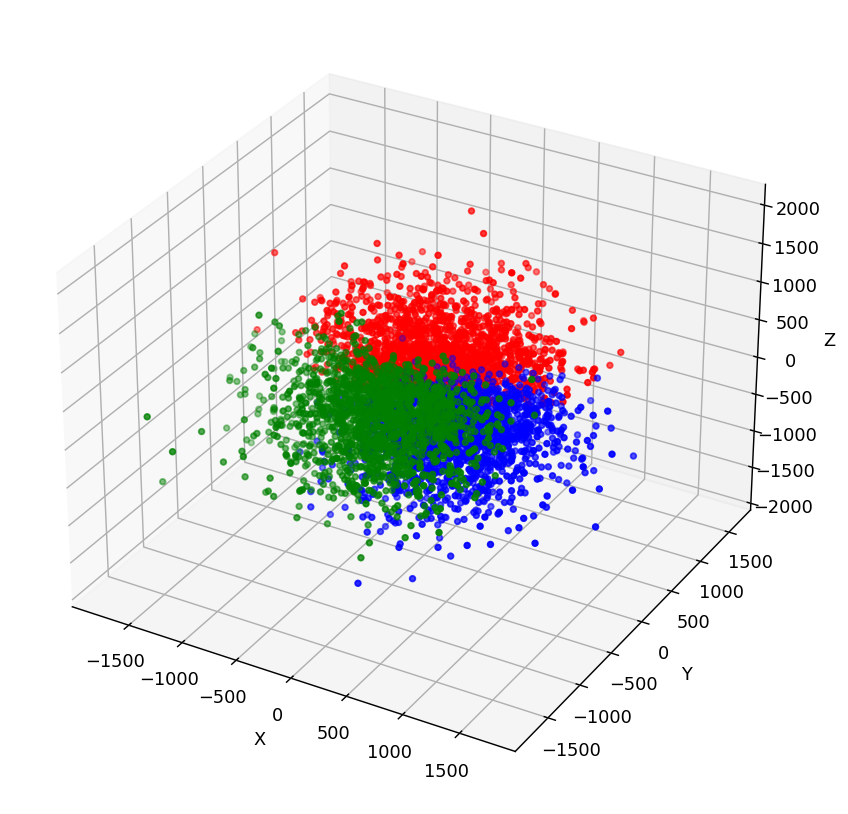

In [3]:
scale = 500
pnum = 5000
n_cl = 3
data = np.random.randn(pnum, 3) * scale
data = data.astype(int)
print('data.shape=', data.shape)

labels = kmeans(data, n_cl)
# labels
# print('labels = \n', labels)

idx = []
for i in range(n_cl):
    idx.append(labels == i)
idx = np.array(idx)
print('idx.shape=', idx.shape)

import matplotlib.pyplot as plt
%matplotlib inline

color_list = ['green', 'red', 'blue']

fig = plt.figure(dpi=128, figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

for i, color in enumerate(color_list):
    print(f'data[idx[{i}].shape=', data[idx[i]].shape)
    ax.scatter(data[idx[i]][:, 0], data[idx[i]][:, 1], data[idx[i]][:, 2],
               s=10, cmap='jet', marker='o', color=color)

ax.set_zlabel('Z', fontsize=10)
ax.set_ylabel('Y', fontsize=10)
ax.set_xlabel('X', fontsize=10)

#### Load video and detect
We use `opencv` to read a video.
<font color=red>Pay attention</font> that data type of `frame` is `uint8`, not `int`; In this lab, frame has 3 channels.
If you don't change `dtype` of frame into `unit8`, video you write will look strange which you can have a try.

In [4]:

def detect(video, n_cl=2):
    # load video, get number of frames and get shape of frame
    cap = cv2.VideoCapture(video)
    fps = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
            int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

    # instantiate a video writer
    video_writer = cv2.VideoWriter(os.path.join(output_path, "result_with_%dclz.mp4" % n_cl),
                                   cv2.VideoWriter_fourcc(*'mp4v'),
                                   (fps / 10),
                                   size,
                                   isColor=True)

    # initialize frame and seeds
    ret, frame = cap.read()


    print("Begin clustering with %d classes:" % n_cl)
    bar = tqdm.tqdm(total=fps)  # progress bar
    while ret:
        frame = np.float32(frame)
        h, w, c = frame.shape

        # k-means
        data = frame.reshape((h * w, c))
        labels = kmeans(data, n_cl=n_cl)

        # give different cluster different colors
        new_frame = np.zeros((h * w, c))
        # dye pixels with colors
        for cls in range(n_cl):
            new_frame[labels == cls] = GBR[cls]
        new_frame = new_frame.reshape((h, w, c)).astype("uint8")
        video_writer.write(new_frame)

        ret, frame = cap.read()
        bar.update()

    # release resources
    video_writer.release()
    cap.release()
    cv2.destroyAllWindows()


video_sample = os.path.join(input_path, "road_video.MOV")
detect(video_sample, n_cl=5)


Begin clustering with 5 classes:


100%|██████████| 35/35 [05:55<00:00, 10.15s/it]


#### Sample Result
<div  align="center"> <img src="images/image-20220804142902993.png"  alt="image-20220804142902993" width=600 align=center /></div>

<div  align="center"> <img src="images/image-20220804143125976.png"   width=600 align=center /></div>

### Questions

1. What are the strengths of K-means; when does it perform well?
2. What are the weaknesses of K-means; when does it perform poorly?
3. What makes K-means a good candidate for the clustering problem, if you have enough knowledge about the data?

### Answer

#### 1.
Pros:
1. K-means is a simple theory that is easy to implement.
2. only need to adjest parameter k, and easy to understand the result. 
3. the cluster result is usually good.

#### 2.
Cons:
1. Hard to converge for concave function.
2. can't properly solve data if the size of classes are not equal or their variance are not equal. 
3. sensitive to outliers.

#### 3. 
K-Means is a easy-to-implement and effective unsupervised classify algorithm that can be used to solve many classify probelms. For data that is convex, has a small in-class-variance, and has similar size, it can converge very fast and give a good result. 